# Libraries

In [40]:
# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Data

## Cultivars information, for reference

In [4]:
file_path = 'data/cultivars-description.ods'

cultivar_description_df = pd.read_excel(file_path)
cultivar_description_df.head()

,Cultivars,Maturation group,Seeds per meter/linear,Density per meter/linear
0,FTR 3190 IPRO,9.0,12.5,250000
1,FTR 4288 IPRO,8.8,11.0,220000
2,NK 8770 IPRO,8.7,16.0,320000
3,M 8606I2X,8.6,10.0,200000
4,M 8644 IPRO,8.6,11.0,220000


## Dataset
### Variables

- **Season:** The season in which the data was collected (integer).
- **Cultivar:** The name of the cultivar (string).
- **Repetition:** The repetition number of the sample (integer).
- **PH:** Plant Height (float).
- **IFP:** Insertion of the First Pod (float).
- **NLP:** Number of Legumes per Plant (float).
- **NGP:** Number of Grains per Plant (float).
- **NGL:** Number of Grains per Pod (float).
- **NS:** Number of Stems (float).
- **MHG:** Thousand Seed Weight (float).
- **GY:** Grain Yield (float).

In [82]:
file_path = 'data/data.csv'
df = pd.read_csv(file_path)

df.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


# Understanding the data

In [83]:
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (320, 11)
Rows: 320 
Columns: 11


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


**Cultivar** is an object. **Season** and **Repetition** are integers and the rest of the features are floats. 

In [87]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Cultivar,320,40,NEO 760 CE,8


There are 40 unique cultivars, the most frequent being NEO 760 CE.

In [88]:
df.describe() # std means standard deviation

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


## Negative values

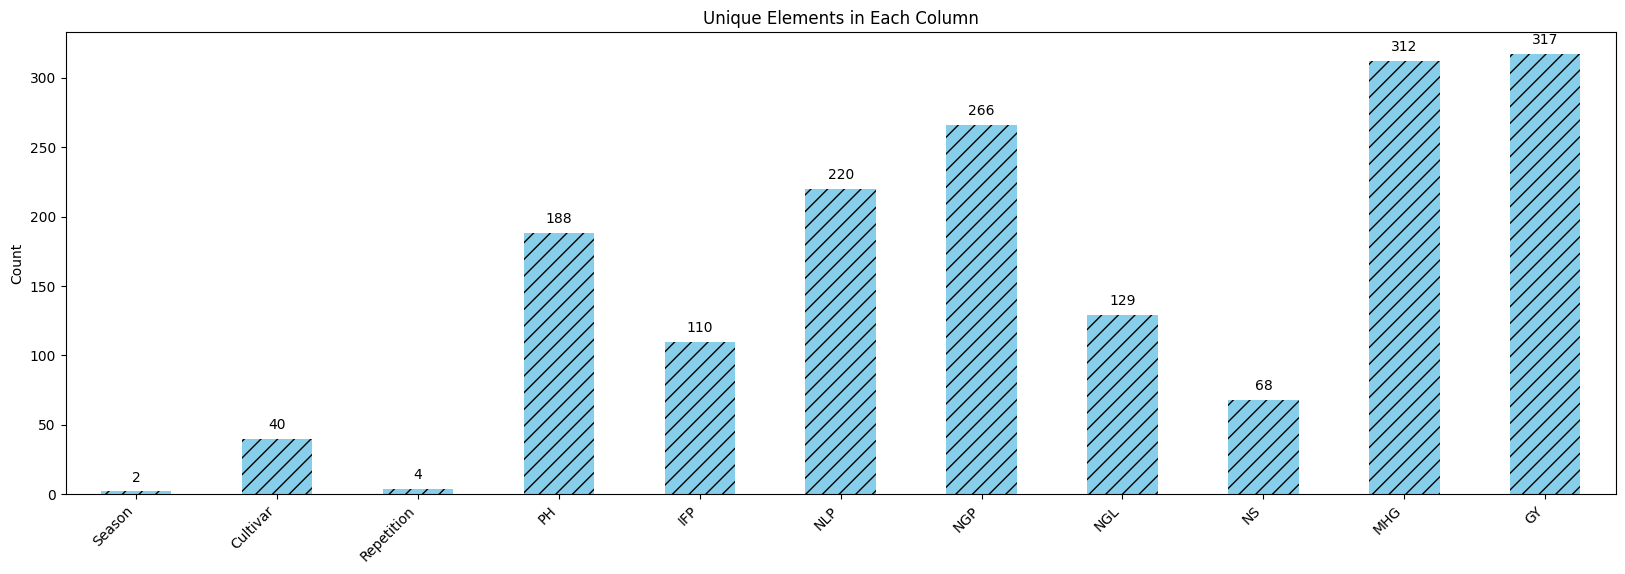

In [93]:
# If there is a negative, the bar will be red

numeric_columns = df.select_dtypes(include=np.number)
negative_values = (numeric_columns < 0).any()

unique = df.nunique()
colors = ['skyblue' if not is_negative else 'red' for is_negative in negative_values]
plt.figure(figsize=(20, 6))
unique.plot(kind='bar', color=colors, hatch='//')
plt.title('Unique Elements in Each Column')
plt.ylabel('Count')
for i, v in enumerate(unique.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.show()


No negative values!

# Data cleaning

In [94]:
# Missing values

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64


In [95]:
# Duplicates

duplicates = df.duplicated()
print("Duplicate rows:", duplicates.any())

Duplicate rows: False


### As we can see, there are no null values nor duplicates. There is no need for handling any missing data or to remove rows.

## Box plots and outliers

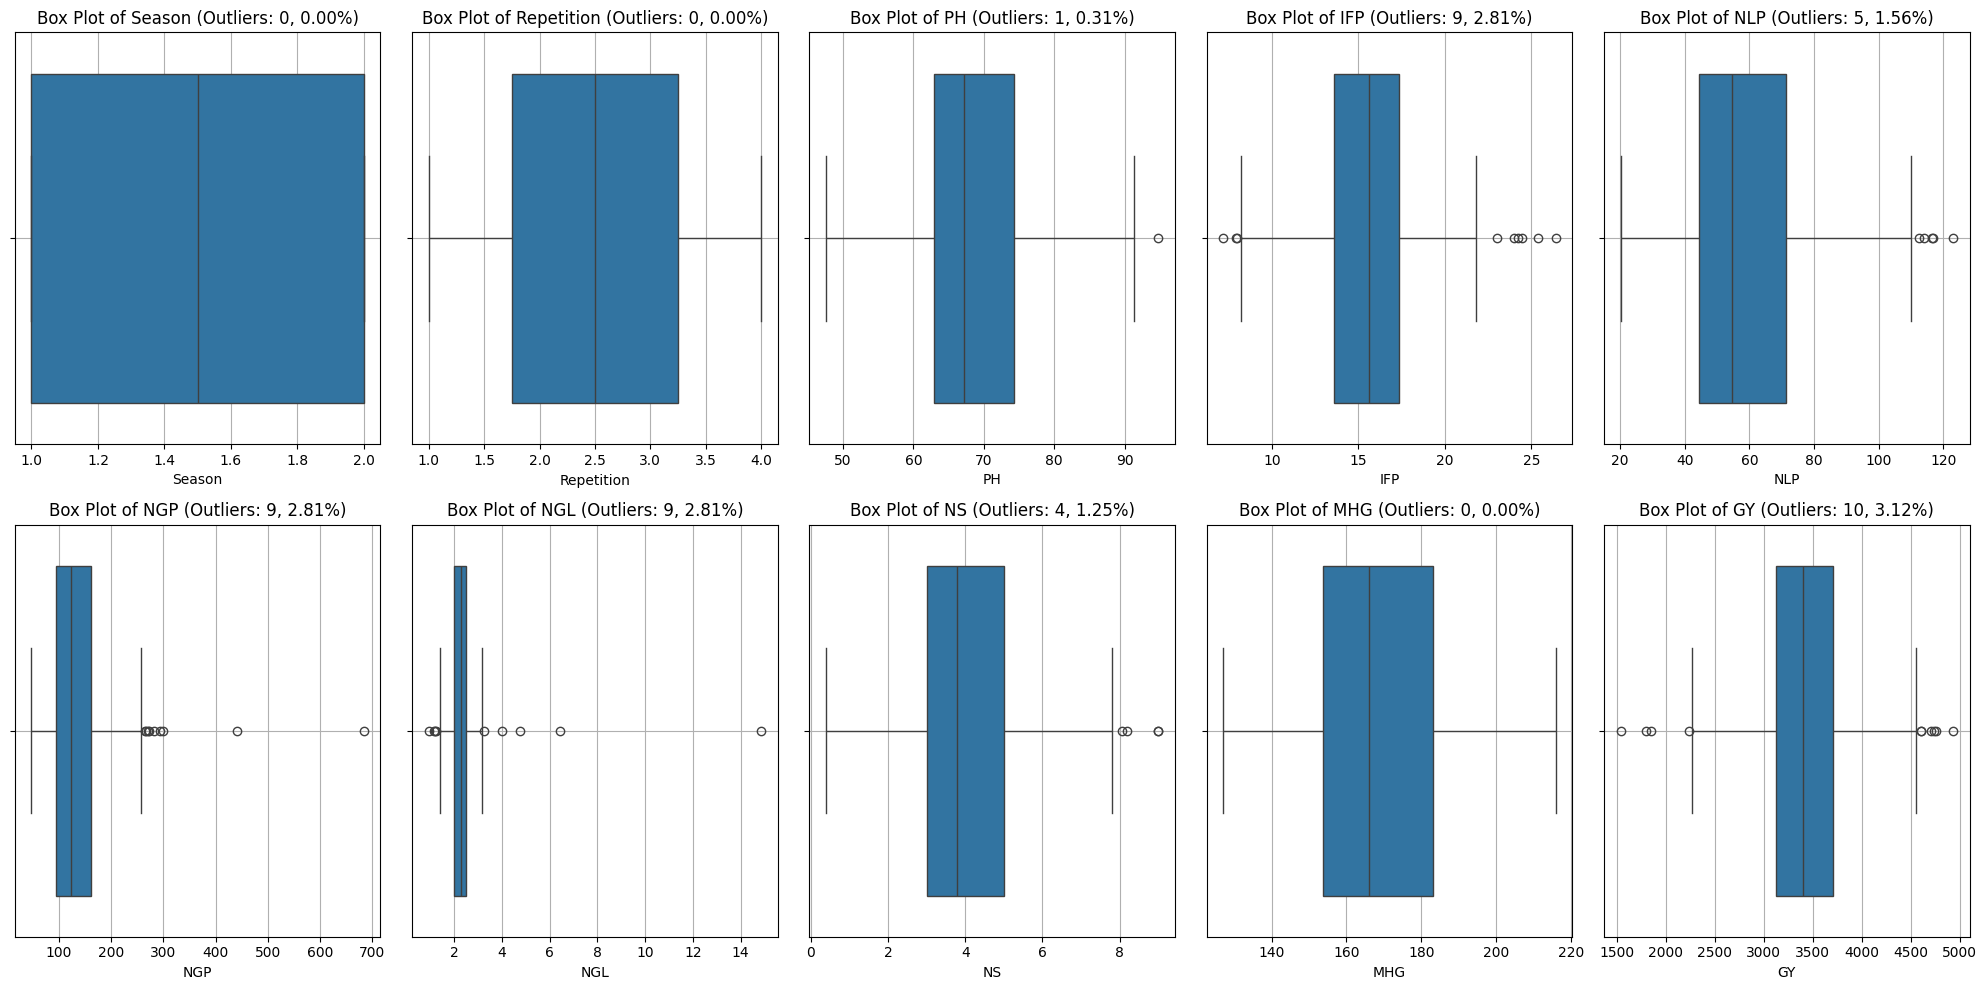

In [104]:
# Box plots
plt.figure(figsize=(20, 10))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 5, i)
    
    # Quartiles
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Percentage of outliers
    outlier_percentage = len(outliers) / len(df) * 100
    
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (Outliers: {len(outliers)}, {outlier_percentage:.2f}%)')
    plt.xlabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Distribution of values

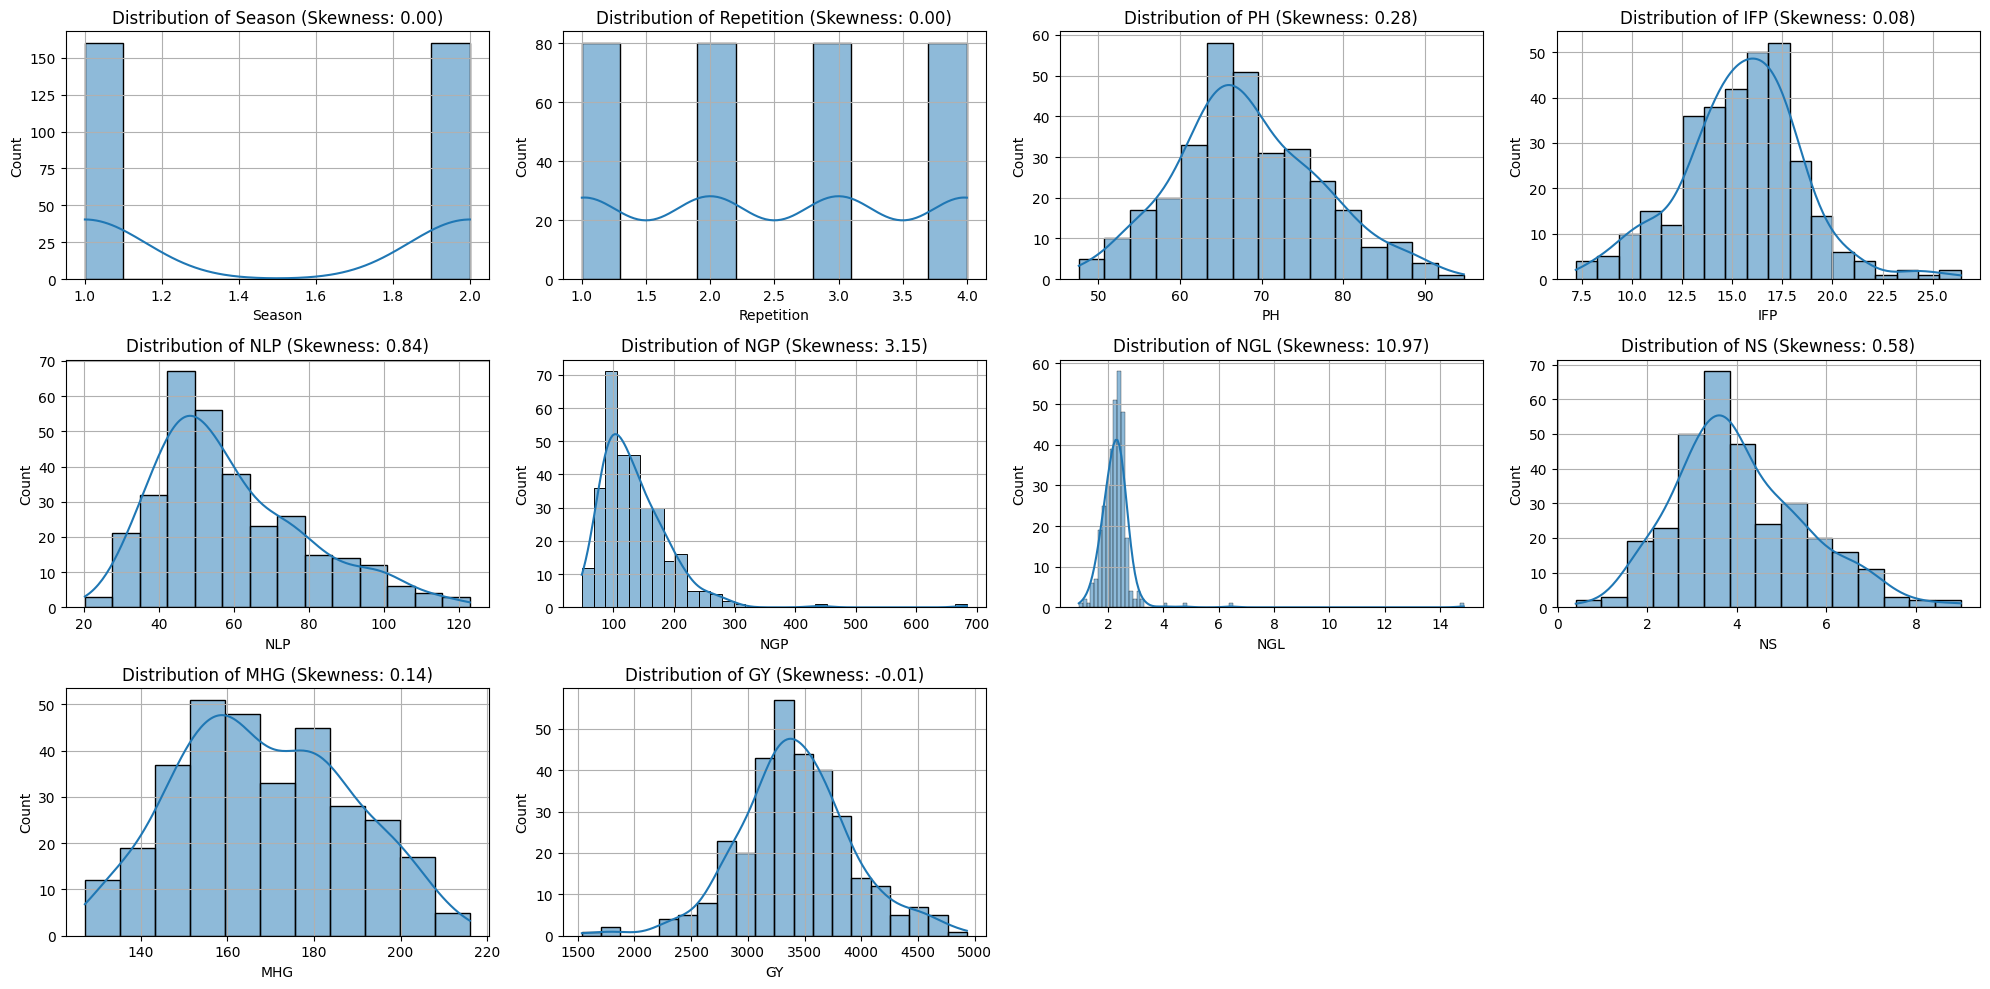

In [117]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.drop(columns=['Cultivar'])):
    plt.subplot(3, 4, i+1)
    
    # Skewness
    skewness = df[column].skew()
    
    sns.histplot(df.drop(columns=['Cultivar'])[column], kde=True)
    plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})')
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

### There are 2 plots with big differences in skewness: the one for NGP and the one for NGL. Let's see the differences with and without the outliers.

Outliers for NGL:
65      4.75
67      3.25
142     0.94
174    14.86
175     6.42
178     1.15
210     1.26
242     1.20
305     4.02
Name: NGL, dtype: float64


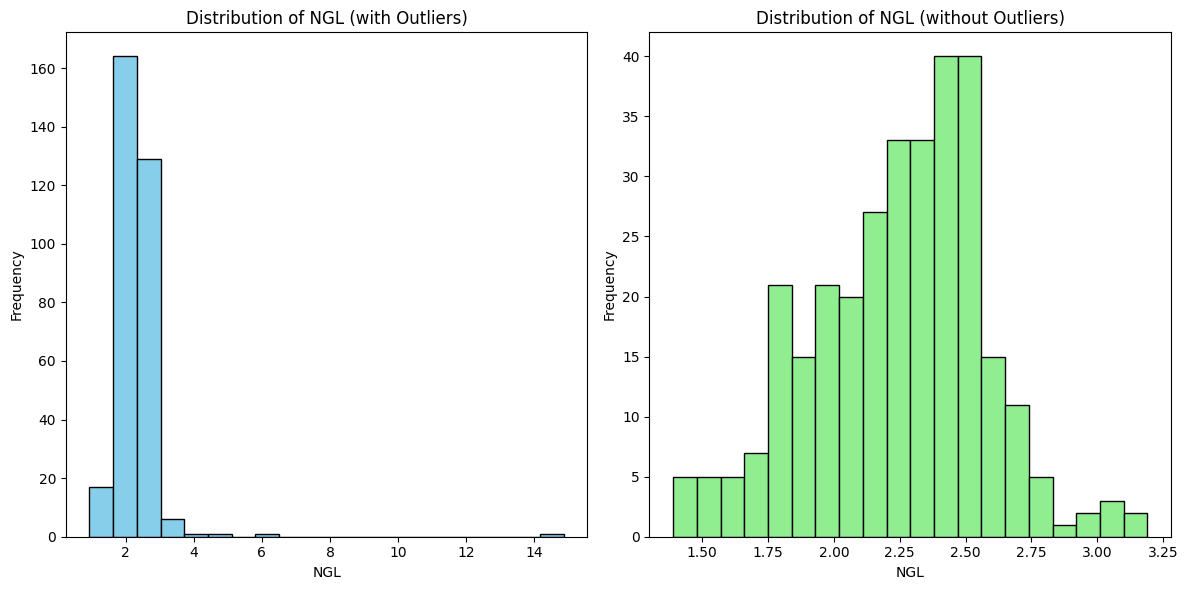

In [121]:
plt.figure(figsize=(12, 6))

# Plot with outliers
plt.subplot(1, 2, 1)
plt.hist(df['NGL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of NGL (with Outliers)')
plt.xlabel('NGL')
plt.ylabel('Frequency')

# Plot without outliers
plt.subplot(1, 2, 2)

Q1 = df['NGL'].quantile(0.25)
Q3 = df['NGL'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_ngl = df[(df['NGL'] >= lower_bound) & (df['NGL'] <= upper_bound)]['NGL']
plt.hist(filtered_ngl, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of NGL (without Outliers)')
plt.xlabel('NGL')
plt.ylabel('Frequency')

# Print outliers
outliers_ngl = df[(df['NGL'] < lower_bound) | (df['NGL'] > upper_bound)]['NGL']
print("Outliers for NGL:")
print(outliers_ngl)

plt.tight_layout()
plt.show()

Outliers for NGP:
14     272.40
174    683.40
175    293.73
204    281.80
206    266.00
216    264.60
305    440.00
307    299.60
317    271.20
Name: NGP, dtype: float64


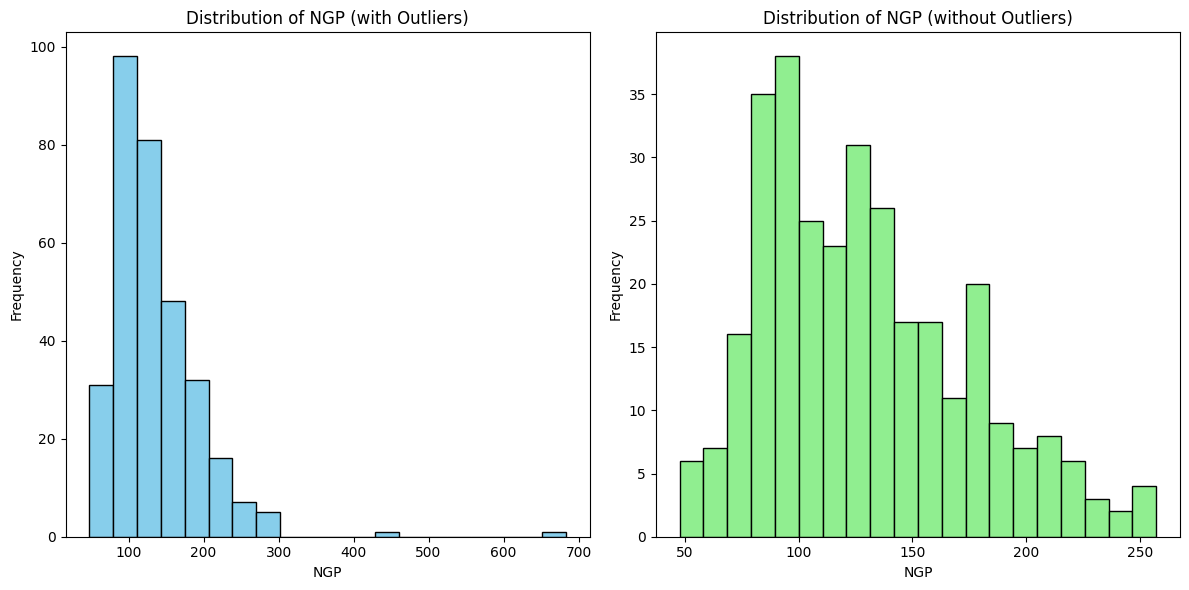

In [122]:
plt.figure(figsize=(12, 6))

# Plot with outliers
plt.subplot(1, 2, 1)
plt.hist(df['NGP'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of NGP (with Outliers)')
plt.xlabel('NGP')
plt.ylabel('Frequency')

# Plot without outliers
plt.subplot(1, 2, 2)

Q1 = df['NGP'].quantile(0.25)
Q3 = df['NGP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_ngp = df[(df['NGP'] >= lower_bound) & (df['NGP'] <= upper_bound)]['NGP']
plt.hist(filtered_ngp, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of NGP (without Outliers)')
plt.xlabel('NGP')
plt.ylabel('Frequency')

outliers_ngp = df[(df['NGP'] < lower_bound) | (df['NGP'] > upper_bound)]['NGP']
print("Outliers for NGP:")
print(outliers_ngp)

plt.tight_layout()
plt.show()


### Even though the outliers might represent genuine insights and removing them could compromise the authenticity of the data, I believe that for NGL and NGP the skewness is too big. So I will consider the outliers as errors and remove some of them only for NGL and NGP (extreme outliers might affect the performance of some models). The outliers don't disproportionately affect the skew of the rest of distributions, so removing them isn't necessary.

In [127]:
# Remove outliers for NGP
df = df[(df['NGP'] <= 300)]

# Remove outliers for NGL
df = df[(df['NGL'] <= 5) & (df['NGL'] >= 1)]

In [143]:
# Reset index
df.reset_index(drop=True, inplace=True)


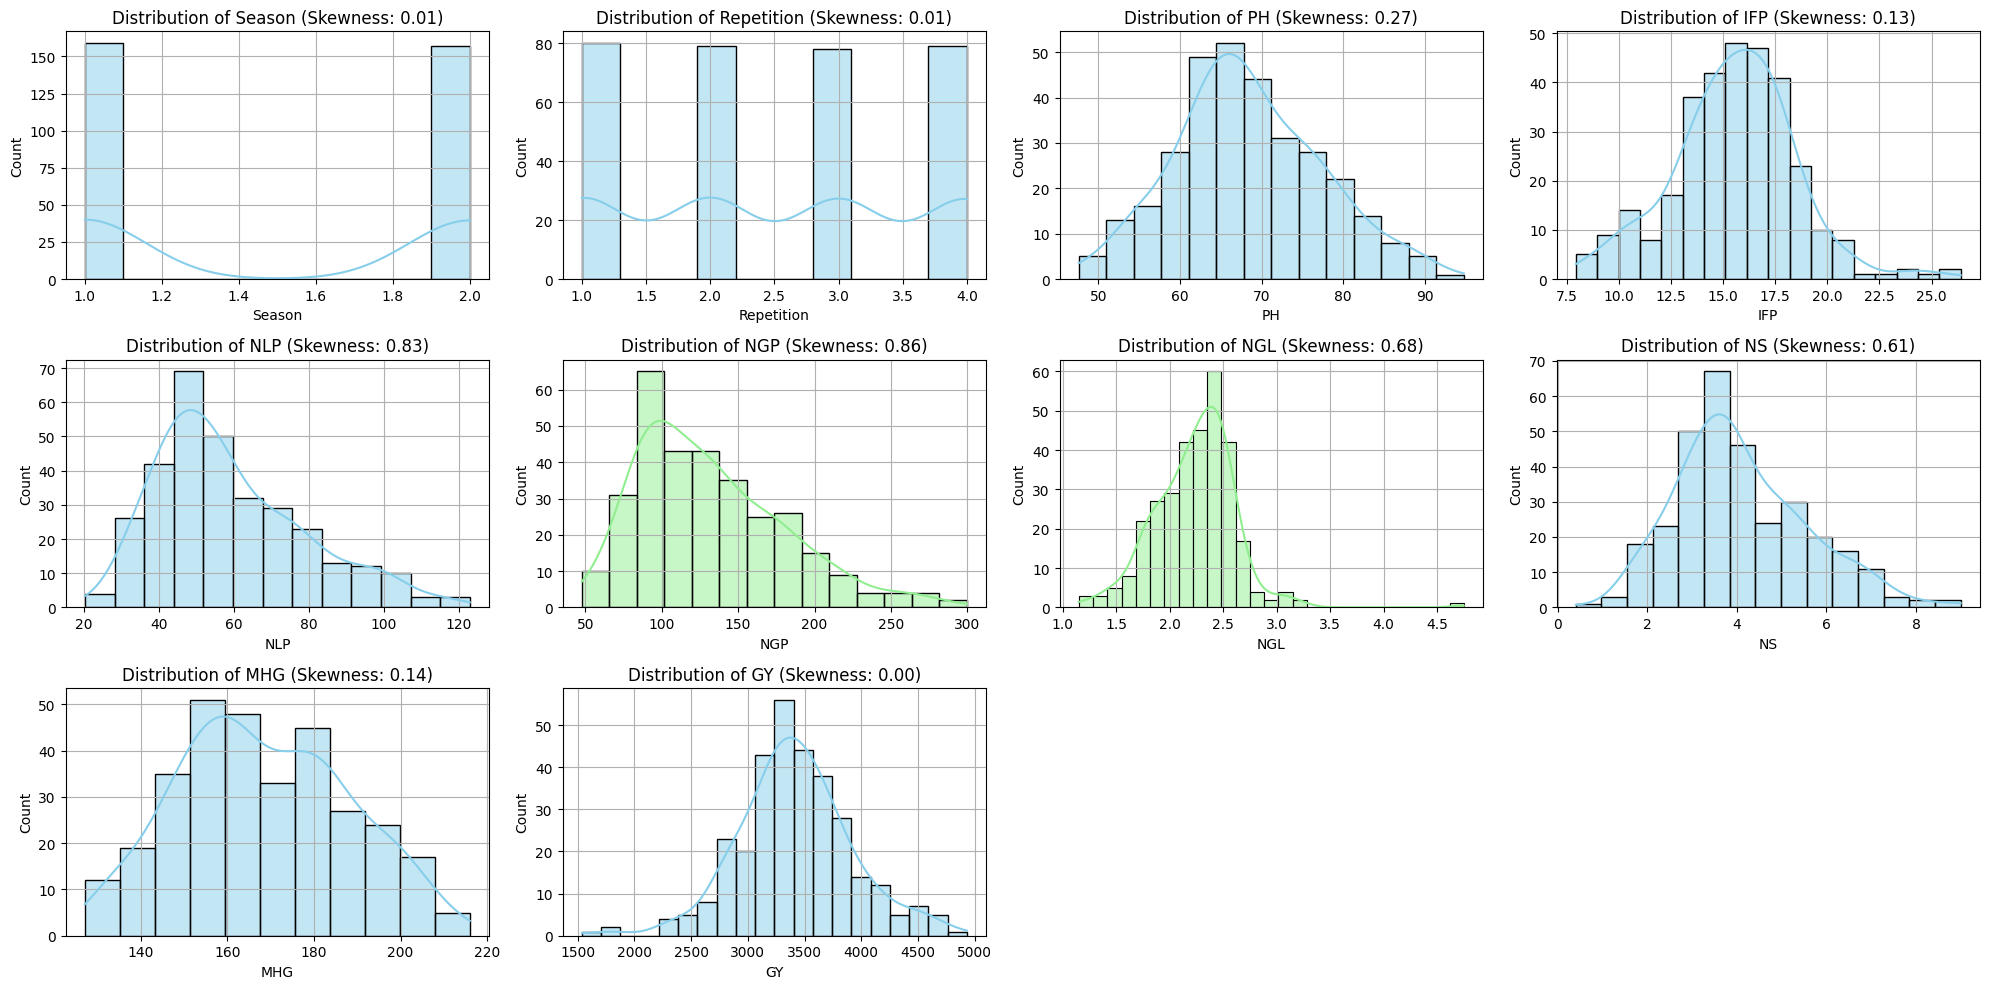

In [144]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(df.drop(columns=['Cultivar'])):
    plt.subplot(3, 4, i+1)
    
    # Skewness
    skewness = df[column].skew()
    
    # Color selection based on column name
    color = 'lightgreen' if column in ['NGP', 'NGL'] else 'skyblue'
    
    sns.histplot(df[column], kde=True, color=color)
    plt.title(f'Distribution of {column} (Skewness: {skewness:.2f})')
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


### Now, the skewness is more proportionate for all features.

# EDA

## Heatmap

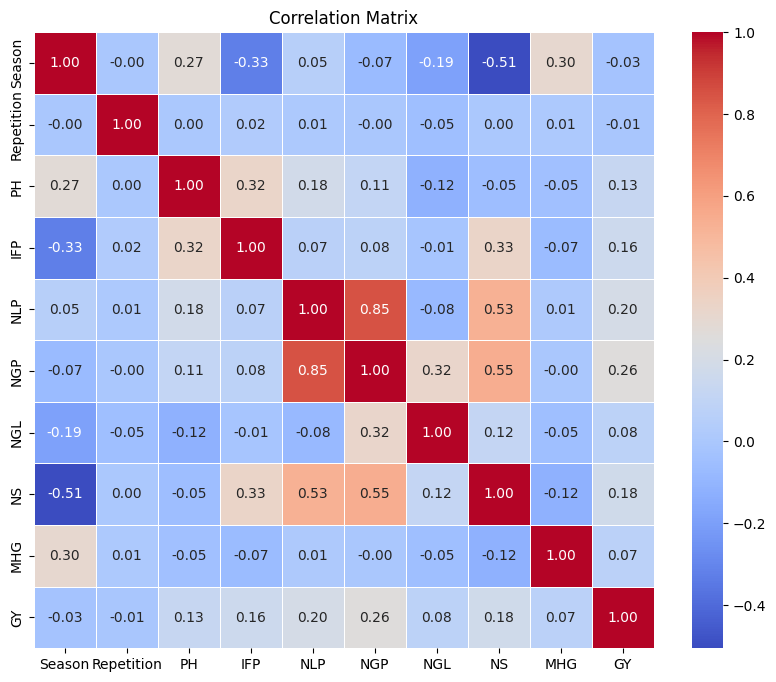

In [152]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- 1: perfect positive correlation (as one variable increases, the other also increases)
- -1: perfect negative correlation (as one variable increases, the other decreases)
- 0: no correlation

In the heatmap:
- **Darker colors** => stronger correlations (closer to -1 or 1)
- **Lighter colors** => weaker correlations (closer to 0)


# Deltas

In [ ]:
season_avg = df.groupby('Season')[['MHG', 'GY']].mean()

delta_mhg = season_avg.loc[2, 'MHG'] - season_avg.loc[1, 'MHG']
delta_gy = season_avg.loc[2, 'GY'] - season_avg.loc[1, 'GY']

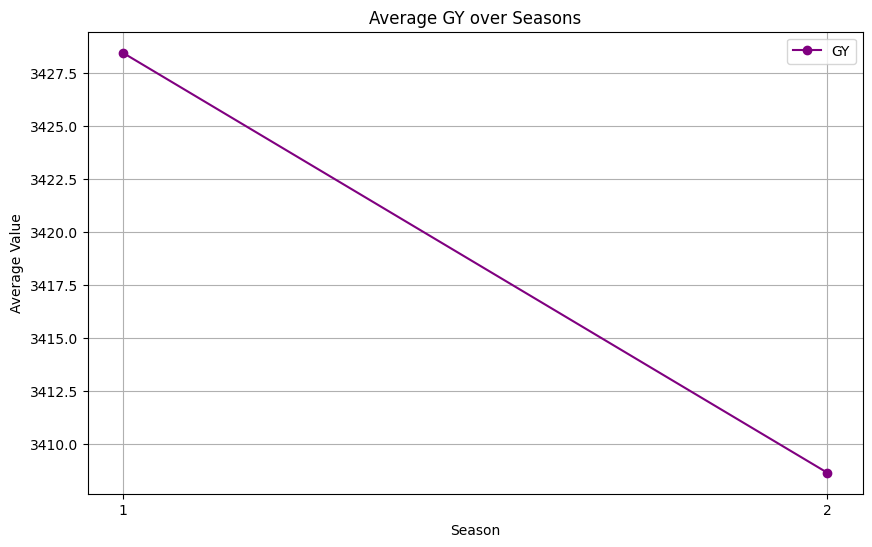

Delta in GY from Season 1 to Season 2: -19.797286649999933


In [ ]:
season_avg = df.groupby('Season')[['GY']].mean()

plt.figure(figsize=(10, 6))
plt.plot(season_avg.index, season_avg['GY'], marker='o', label='GY', color='purple')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.title('Average GY over Seasons')
plt.xticks(season_avg.index)
plt.legend()
plt.grid(True)
plt.show()

print("Delta in GY from Season 1 to Season 2:", delta_gy)

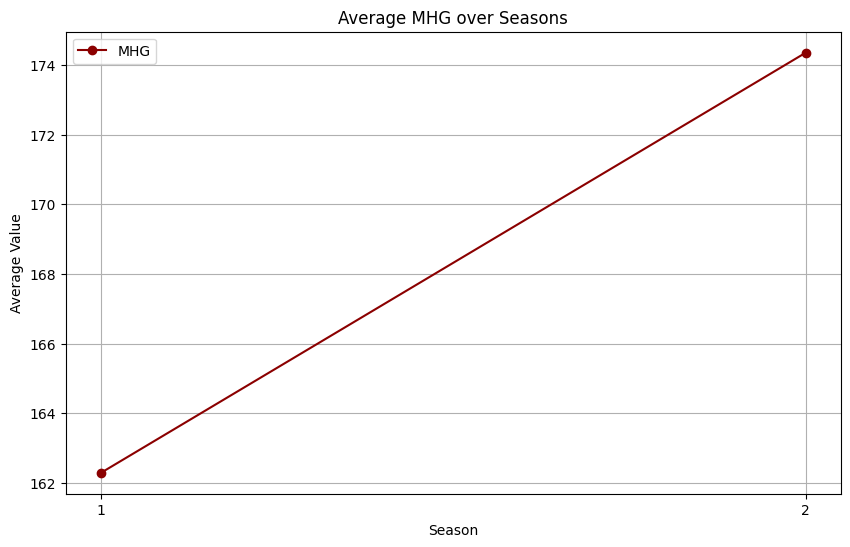

Delta in MHG from Season 1 to Season 2: 12.067000000000007


In [ ]:
season_avg = df.groupby('Season')[['MHG']].mean()

plt.figure(figsize=(10, 6))
plt.plot(season_avg.index, season_avg['MHG'], marker='o', label='MHG', color='darkred')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.title('Average MHG over Seasons')
plt.xticks(season_avg.index)
plt.legend()
plt.grid(True)
plt.show()

print("Delta in MHG from Season 1 to Season 2:", delta_mhg)


## Scaling them to see changes over seasons

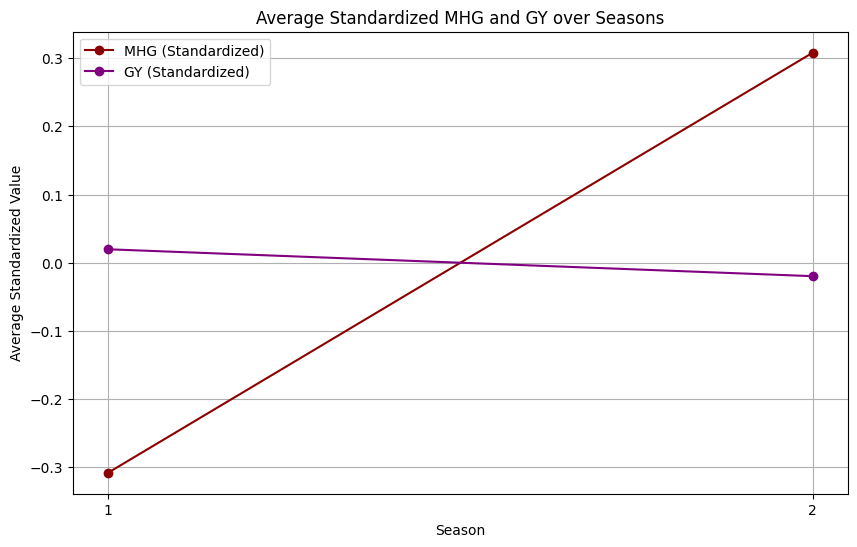

In [ ]:
scaler = StandardScaler()
df_aux = df
df_aux[['MHG_scaled', 'GY_scaled']] = scaler.fit_transform(df_aux[['MHG', 'GY']])

season_avg_scaled = df_aux.groupby('Season')[['MHG_scaled', 'GY_scaled']].mean()

plt.figure(figsize=(10, 6))
plt.plot(season_avg_scaled.index, season_avg_scaled['MHG_scaled'], marker='o', label='MHG (Standardized)', color='darkred')
plt.plot(season_avg_scaled.index, season_avg_scaled['GY_scaled'], marker='o', label='GY (Standardized)', color='purple')
plt.xlabel('Season')
plt.ylabel('Average Standardized Value')
plt.title('Average Standardized MHG and GY over Seasons')
plt.xticks(season_avg_scaled.index)
plt.legend()
plt.grid(True)
plt.show()

# Feature scaling

In [202]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# PCA

Number of components to explain 95% variance: 8


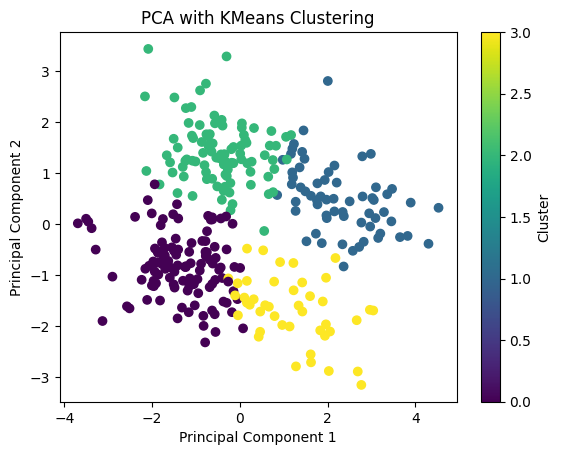

In [204]:
pca = PCA()
pca.fit(df[numeric_columns])
pca_data = pca.transform(df[numeric_columns])

explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)
num_components_95 = np.argmax(cumulative_variance_ratios >= 0.95) + 1

print(f"Number of components to explain 95% variance: {num_components_95}")

kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()